In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpi3o8w8p4GP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.01,
    'A_val': 0.39,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 50

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 5

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpi3o8w8p4GP2/unet_0.model
History saved to /tmp/tmpi3o8w8p4GP2/history_0.pickle
Testing the classifier...
94/94 [==============================] - 9s 98ms/step - loss: 1.4677 - dice_coeff: 0.2227
Model saved to /tmp/tmpi3o8w8p4GP2/cnnd_0.model
History saved to /tmp/tmpi3o8w8p4GP2/cnnd_history_0.pickle
Testing the discriminator...
19/19 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 301 machine labels.
Replacing 150 from 301 !
Removed: 116 Filled: 116
TOOK 766.2930052280426 seconds
***
RUN: 1
Model saved to /tmp/tmpi3o8w8p4GP2/unet_1.model
History saved to /tmp/tmpi3o8w8p4GP2/history_1.pickle
Testing the classifier...
94/94 [==============================] - 10s 107ms/step - loss: 1.0028 - dice_coeff: 0.3607
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 46.0998 - accuracy: 0.7533
Found 150 machine labels.
Replacing 75 from 150 !
Removed: 63 Filled: 63
TOOK 665.28986

In [10]:
R.classifier_scores

[[1.4676897525787354, 0.22269688546657562],
 [1.0028144121170044, 0.3606952428817749],
 [0.7211958765983582, 0.4894600808620453],
 [0.7094272375106812, 0.497834712266922],
 [0.655565083026886, 0.5275560617446899]]

In [11]:
R.discriminator_scores

[[0.0, 1.0],
 [46.099830627441406, 0.753333330154419],
 [122.13922882080078, 0.5649999976158142],
 [127.24237060546875, 0.5633333325386047],
 [161.5722198486328, 0.5266666412353516]]

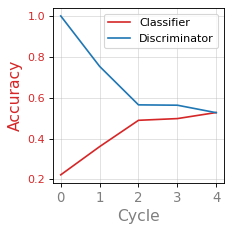

In [12]:
R.plot()